In [35]:
import os
import math
import pickle
import numpy as np
from math import log
from scipy import signal 
import matplotlib as mpl
from statistics import mean
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [36]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 9
rcParams.update({'figure.max_open_warning': 0,
                 'font.size': 14,
                 'axes.titlesize': 14,
                 'axes.labelsize': 14,
                 'axes.grid':True,
                 'xtick.direction': 'in',
                 'ytick.direction': 'in',
                 'ytick.right': True,
                 'xtick.top':True,                 
                 'ytick.major.size': 10,
                 'xtick.major.size': 10,
                 'legend.fancybox': True,
                 'legend.markerscale': 0.8,
                 'legend.handlelength': 5.0
                 #'axes.prop_cycle': cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']),

                 
                 #'xtick.labelsize': 12,
                 #'ytick.labelsize': 12
                })

#from cycler import cycler
mpl.rcParams['grid.linestyle'] = '-.'
#rcParams.keys() 
#plt.style.use('dark_background')
#print(plt.style.available)

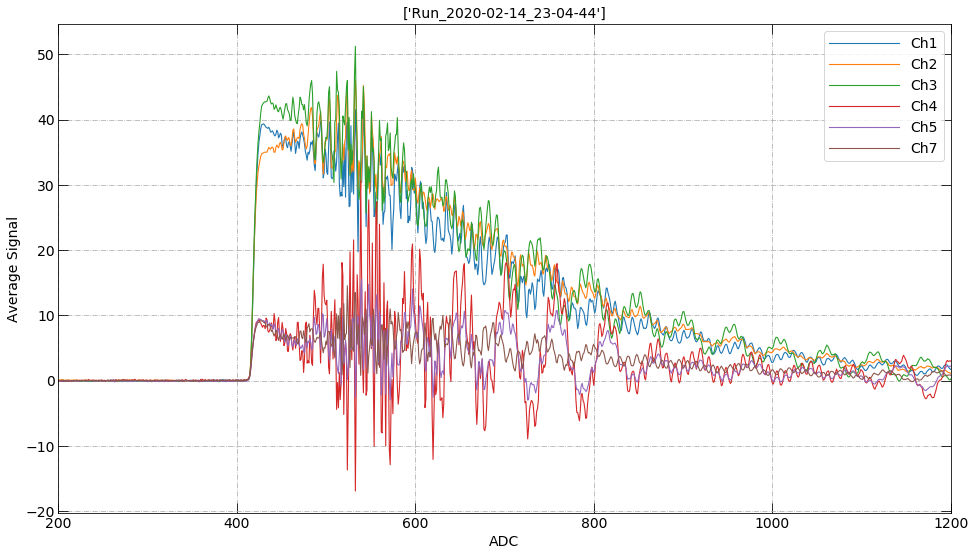

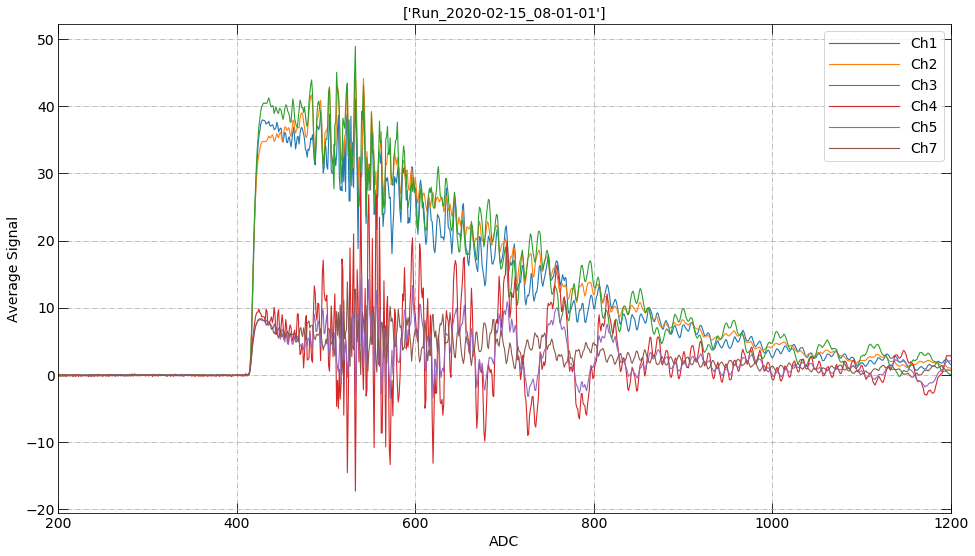

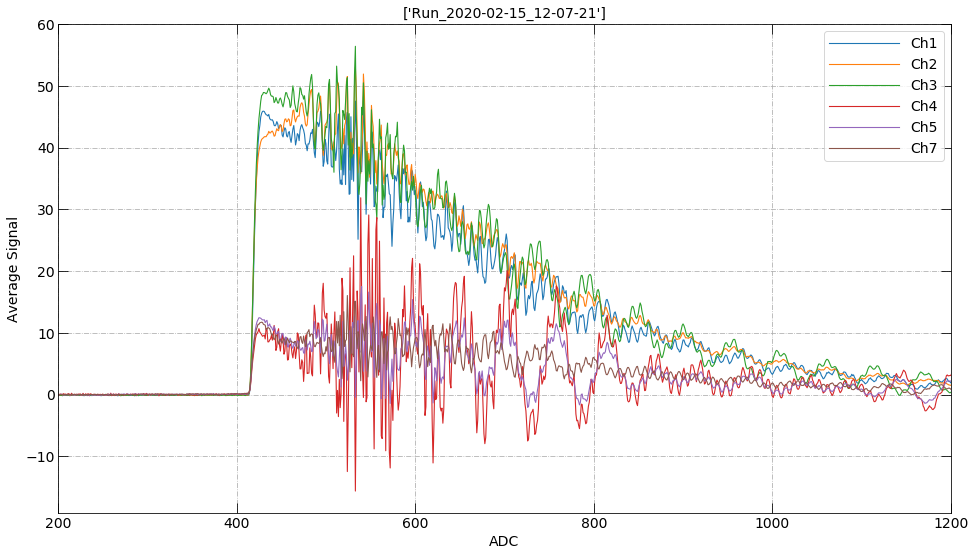

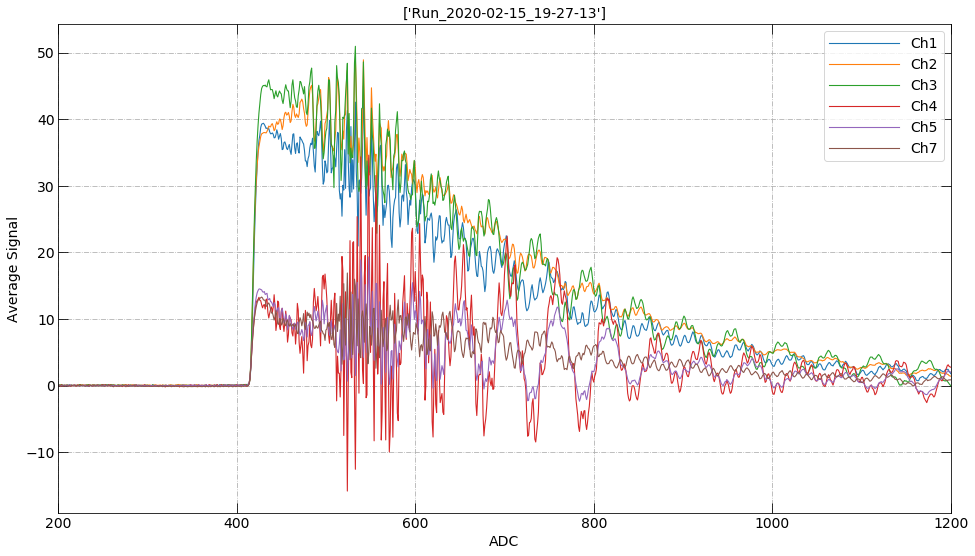

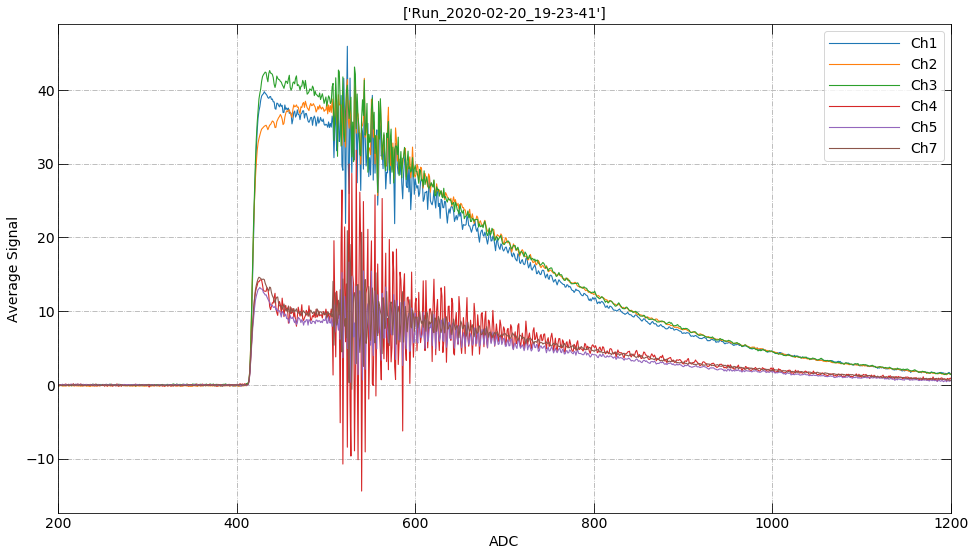

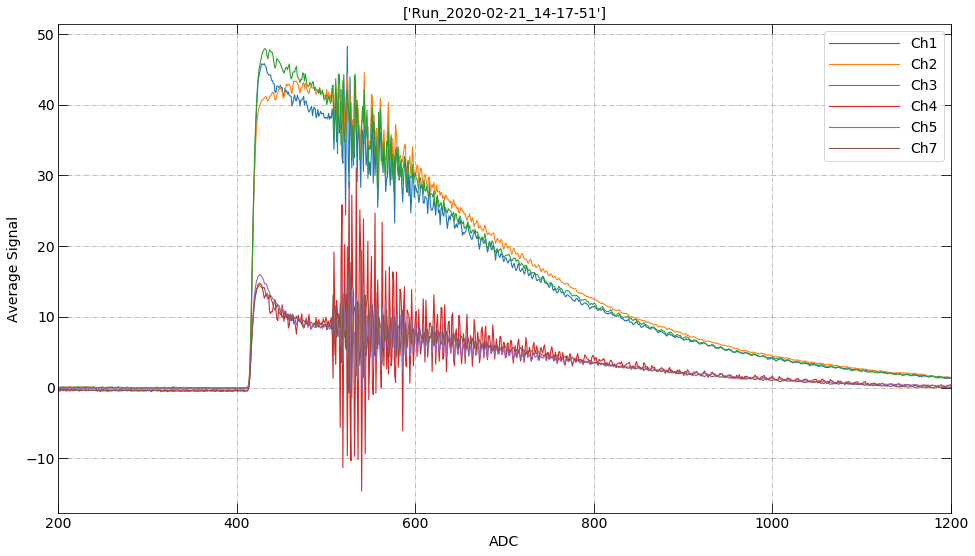

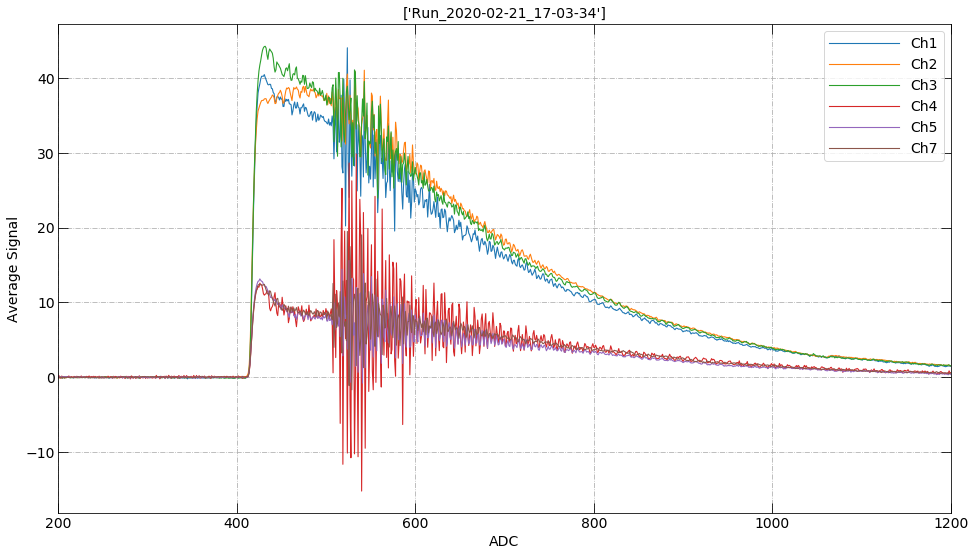

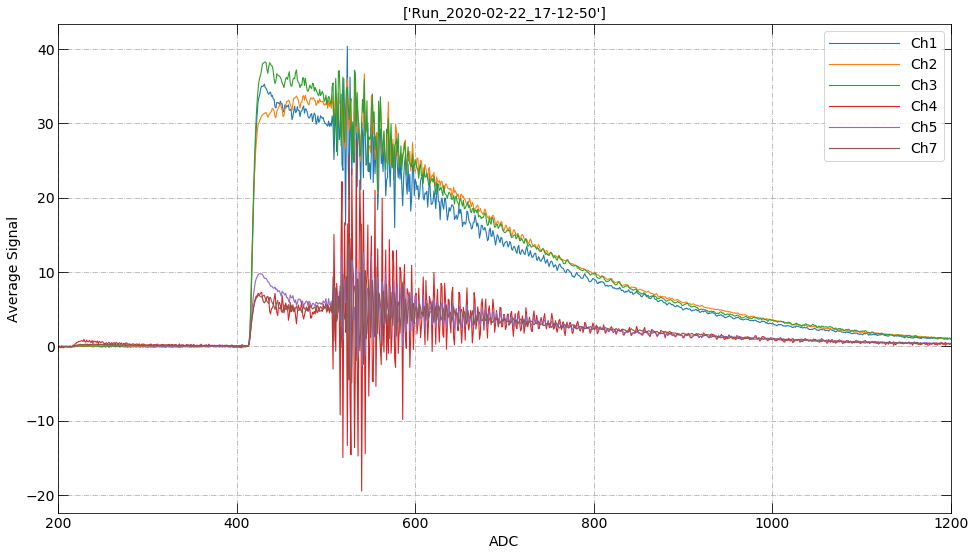

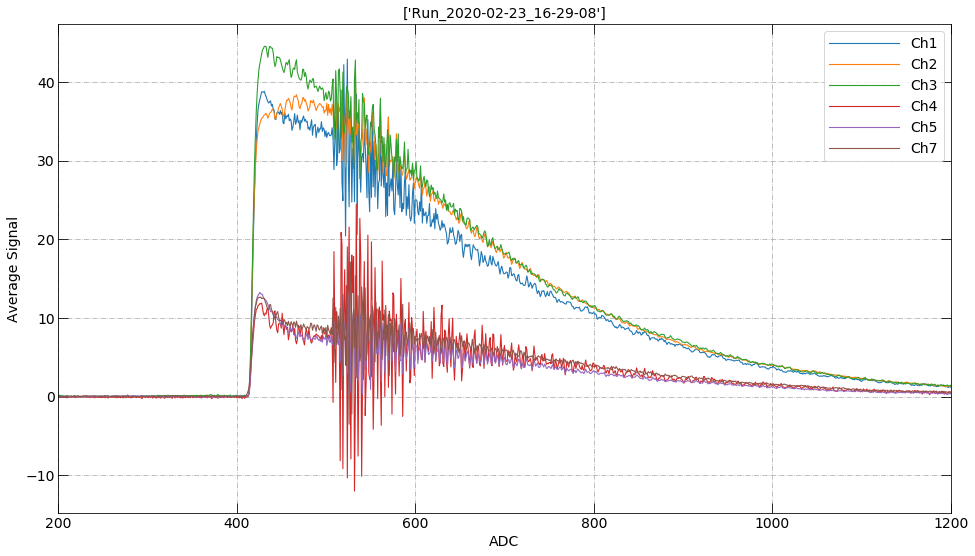

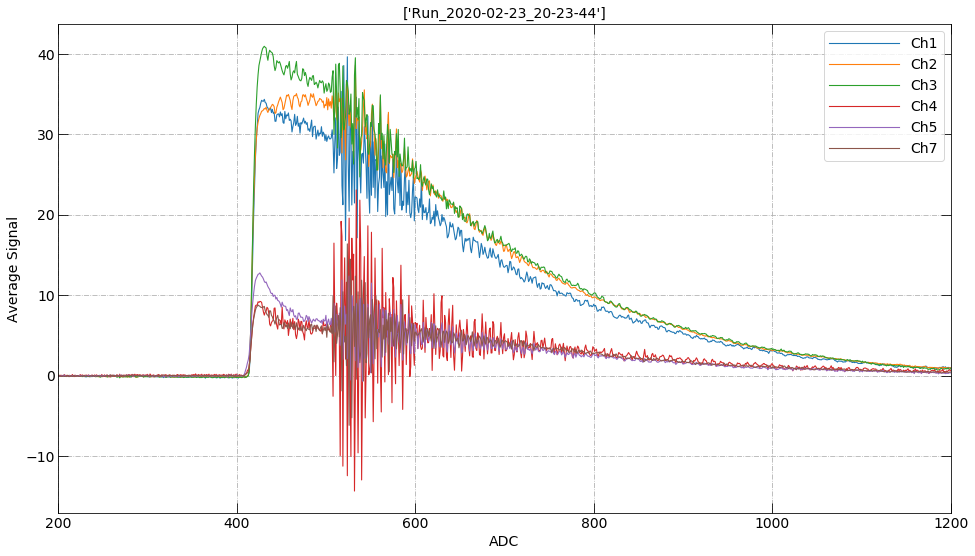

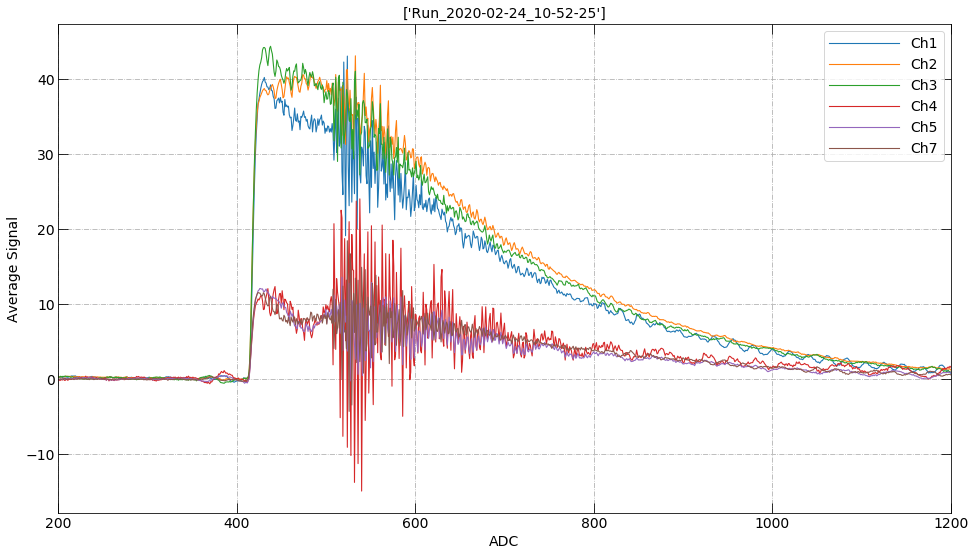

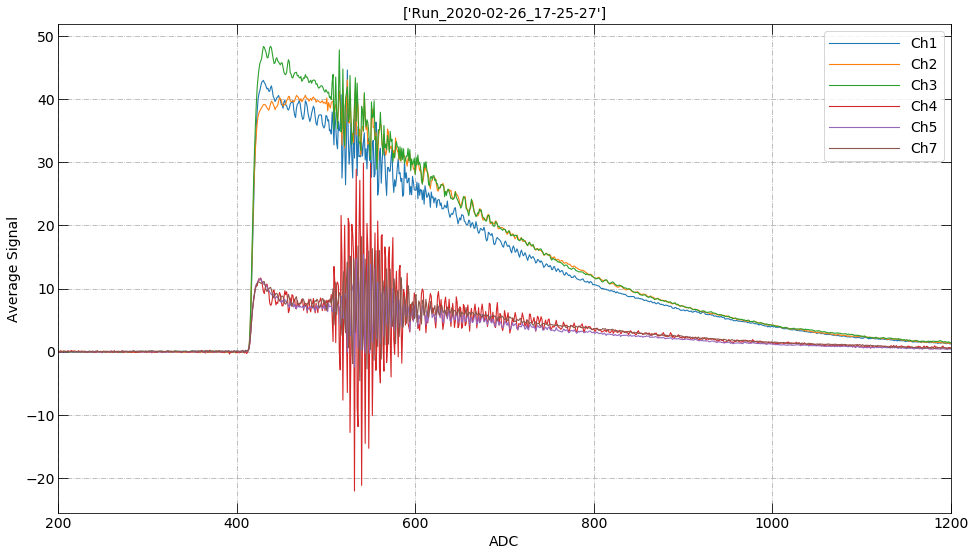

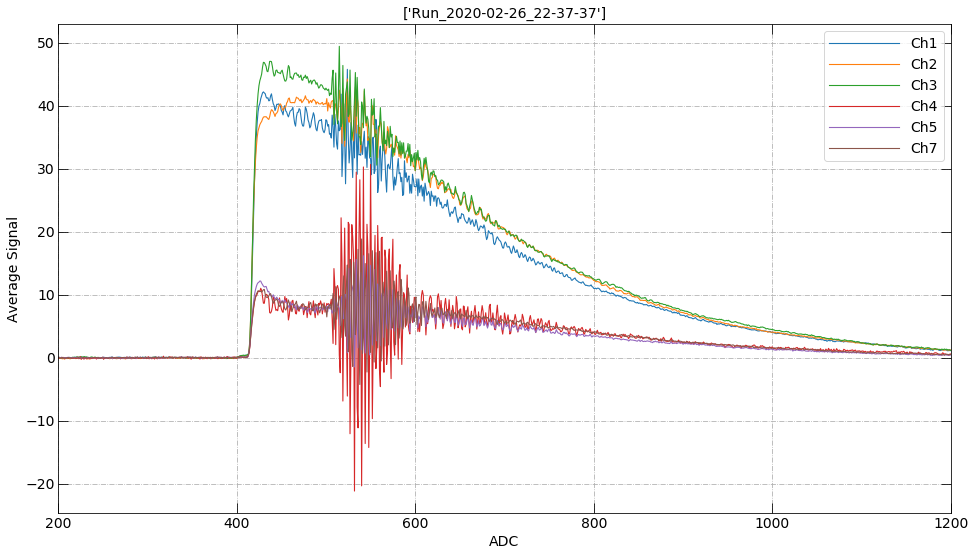

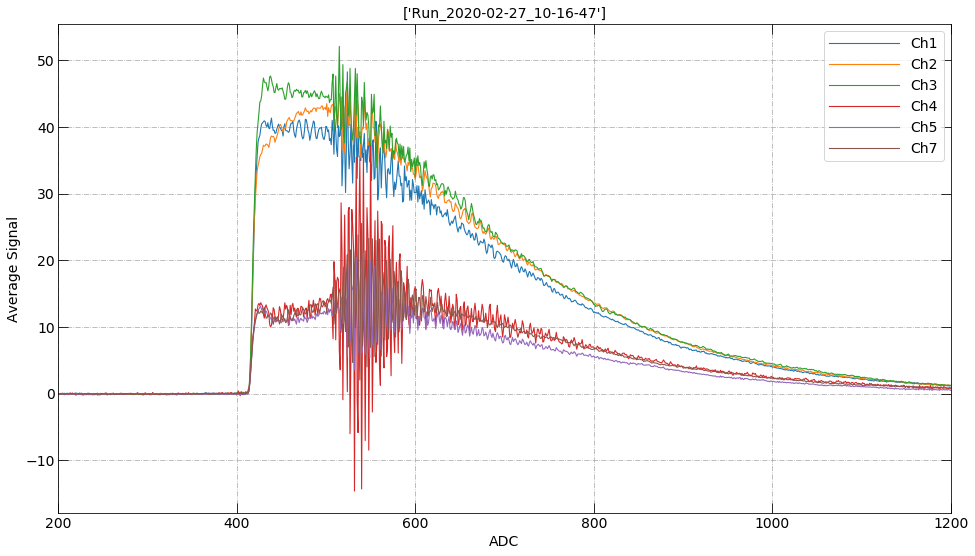

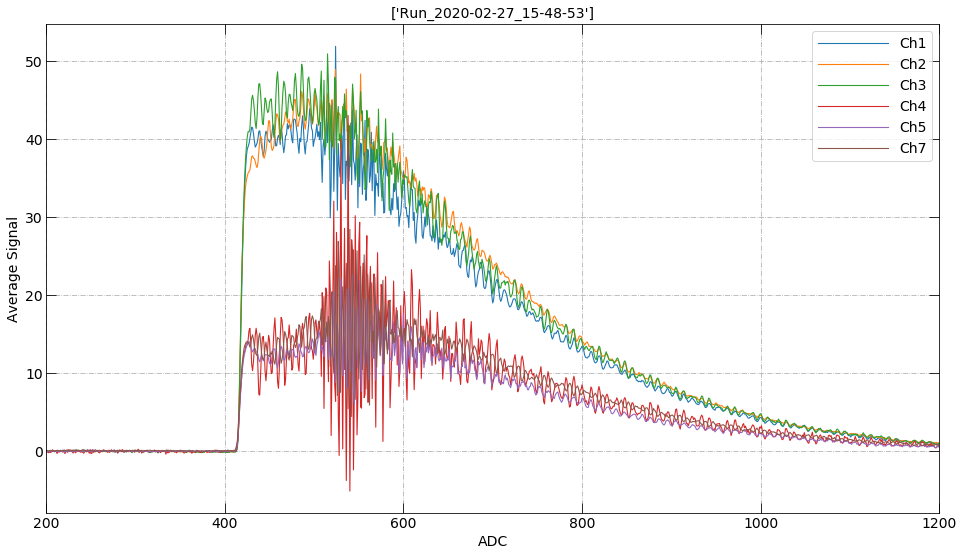

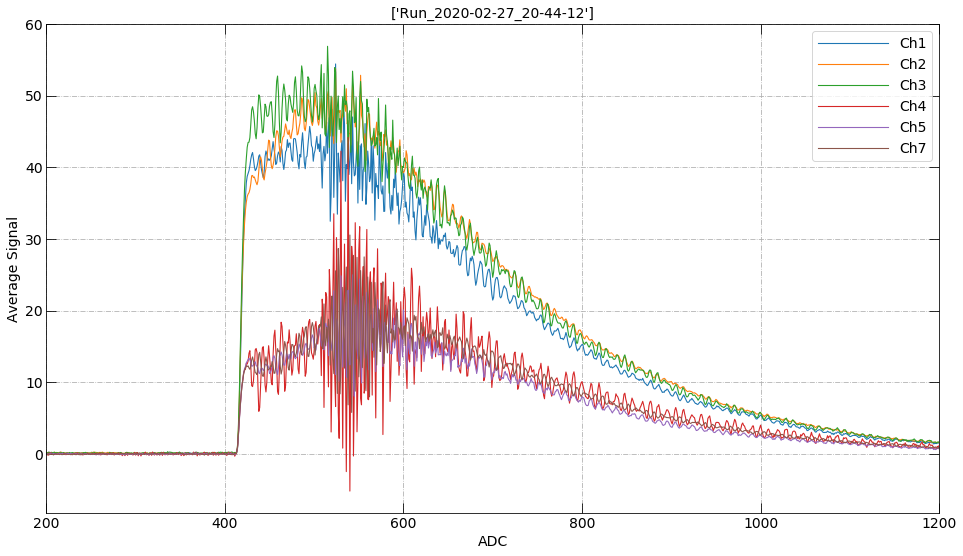

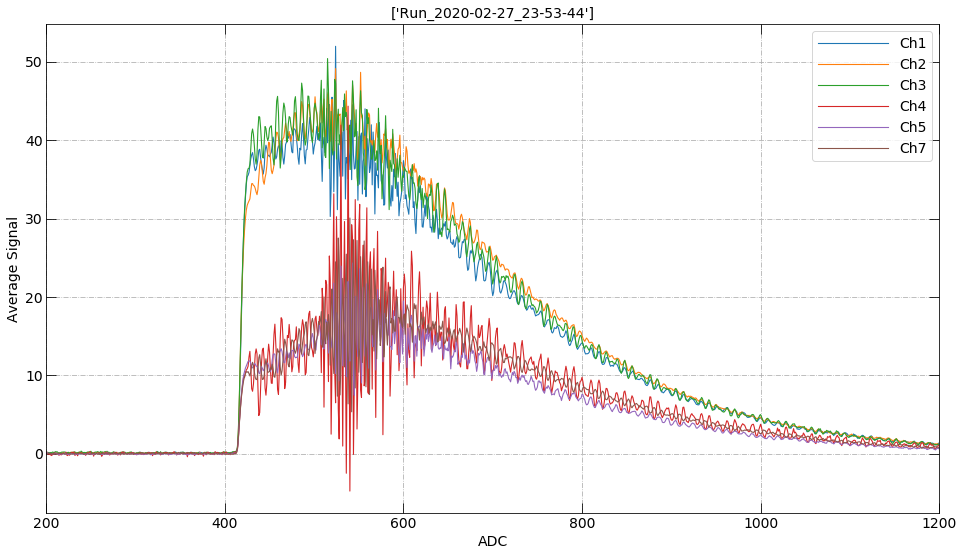

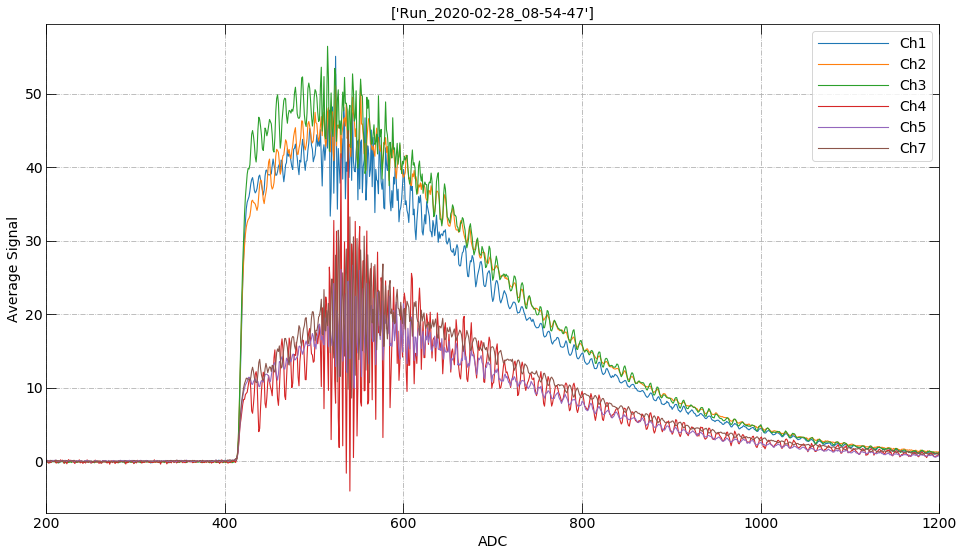

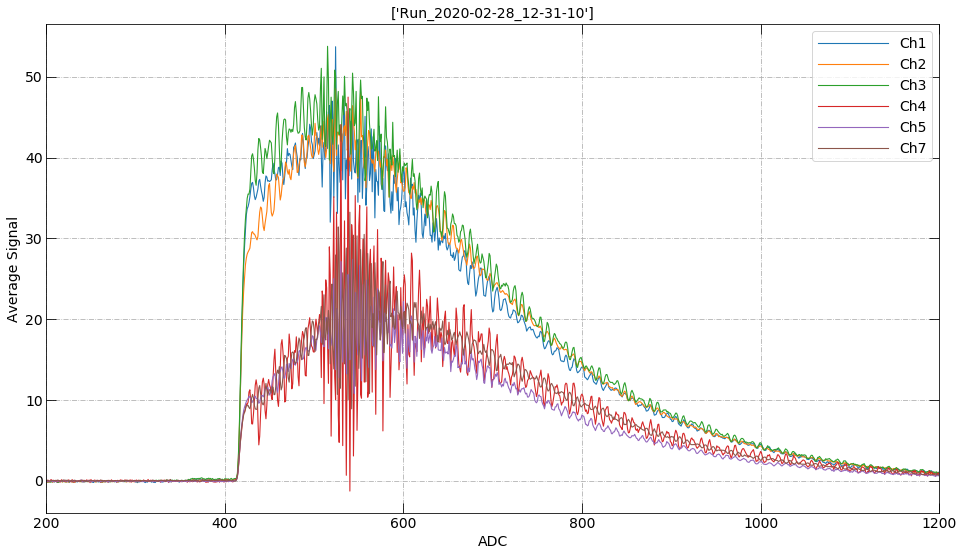

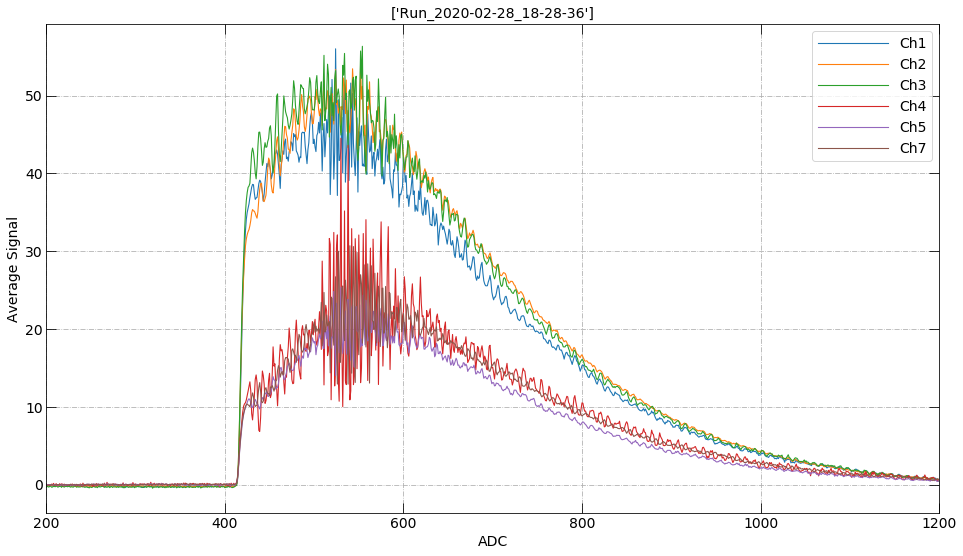

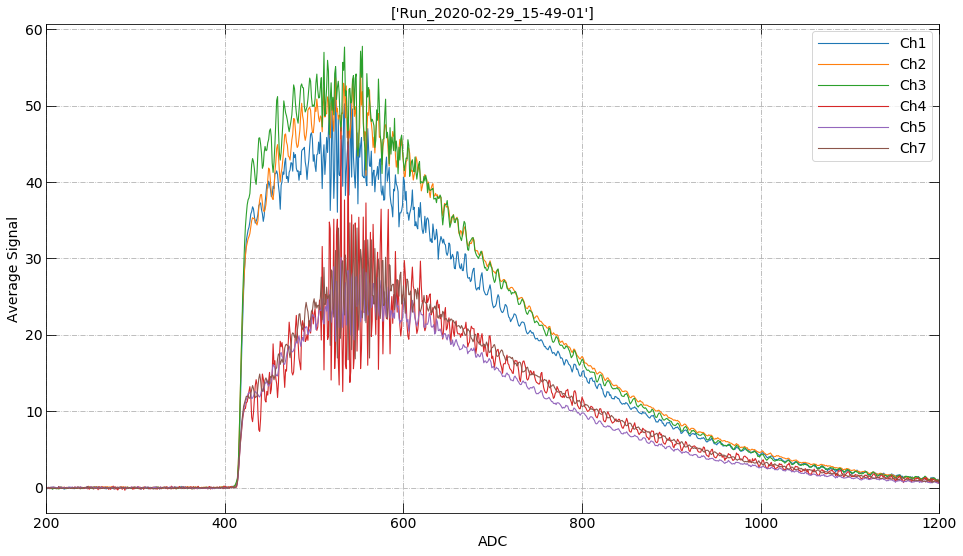

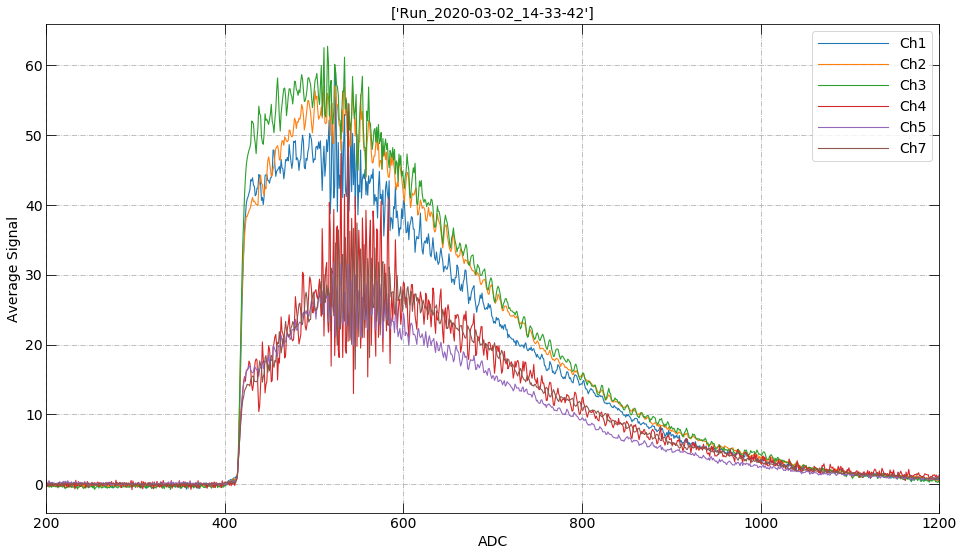

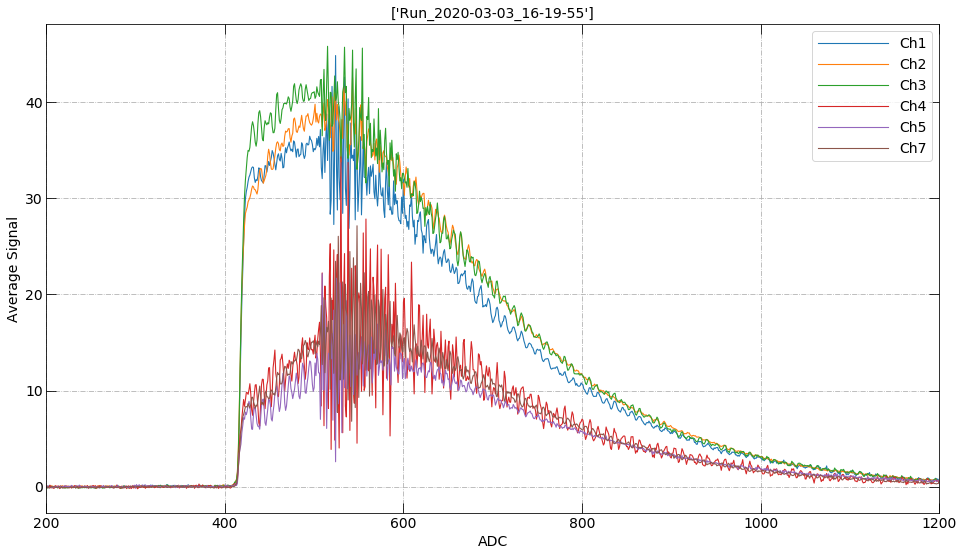

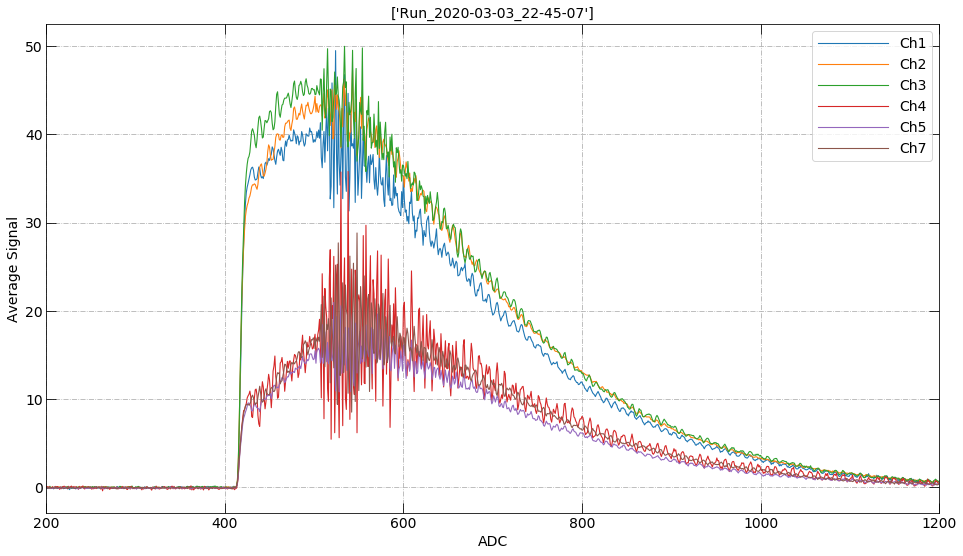

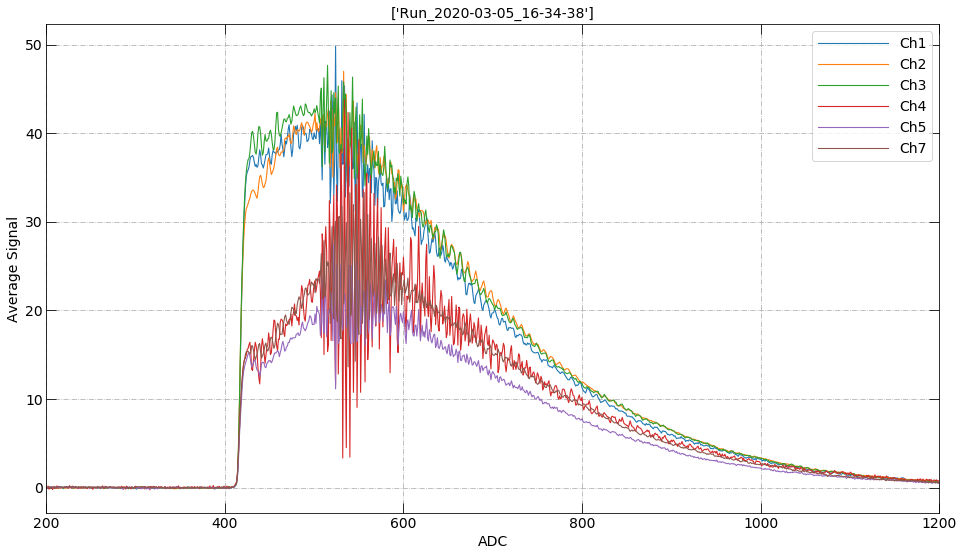

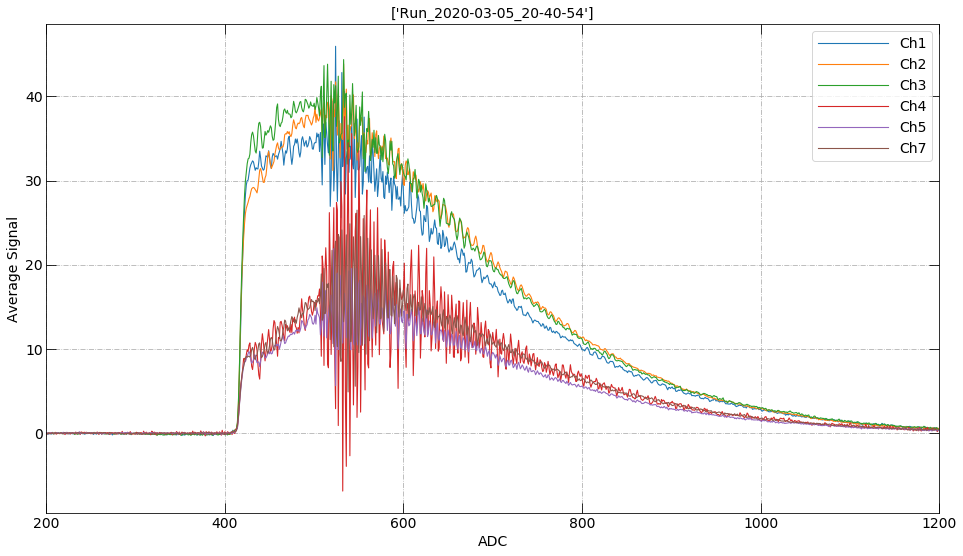

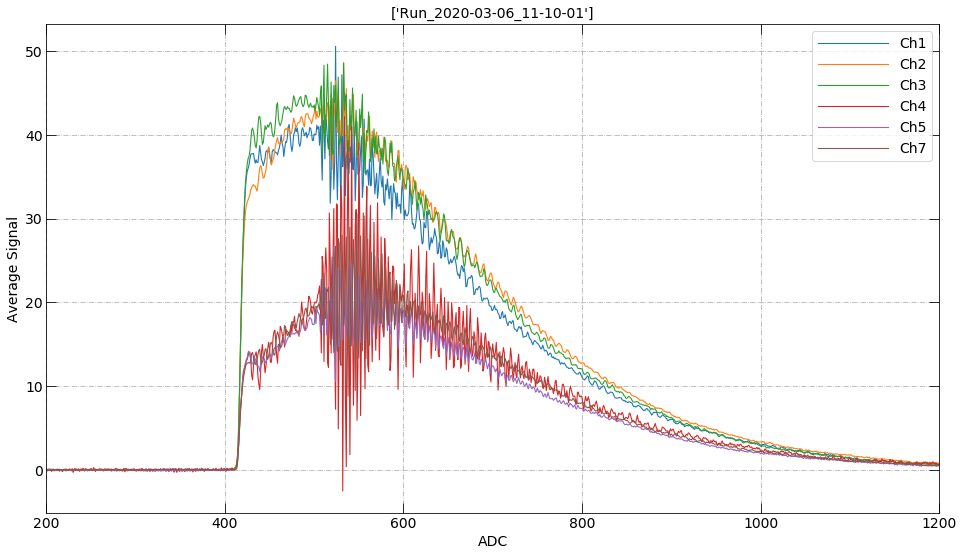

In [58]:
dirname = '/home/furkan/data/pods/'
Run = []
if not os.path.exists('run_by'):
    os.makedirs('run_by')

for filename in sorted(os.listdir(dirname)):
    if '.pkl' in filename:
            #print(str(os.path.splitext(filename)[0]))
            Run = []
            Run: Run.append('Run_' +filename.split('.pkl')[0])
            #print(Run)
            with open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)
            #pkl_file = open(dirname + str(os.path.splitext(filename)[0]) + '.pkl', 'rb')
            #mydata = pickle.load(pkl_file)

            dict_s ={}
            for key, value in mydata.items():
                #print(mydata[key].max(axis=0))
                channel=mydata[key]
                dict_s.update({key:channel})

            for key, value in dict_s.items():
                plt.plot(range(1, len(value) + 1), value, label=key, linewidth=1.1)
                # NOTE: changed `range(1, 4)` to mach actual values count
            plt.title(Run)
            plt.xlabel('ADC')
            plt.ylabel('Average Signal')
            plt.ticklabel_format(style='plain')
            #plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
            plt.legend() 
            #plt.yscale('log')
            plt.xlim(200, 1200)
            #plt.ylim(-25, 80)
            #plt.xlim(300, 1500)

            #plot_path = os.path.abspath('run_by') 
            #plot_name = 'run_by'+str(filename.split('.pkl')[0])+'.png'
            #plt.savefig(os.path.join(plot_path, plot_name))
            plt.show()


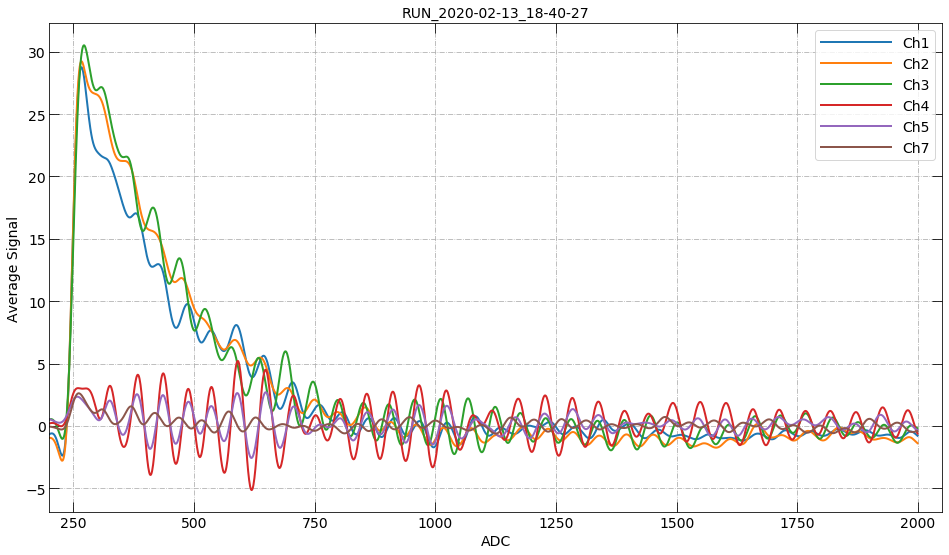

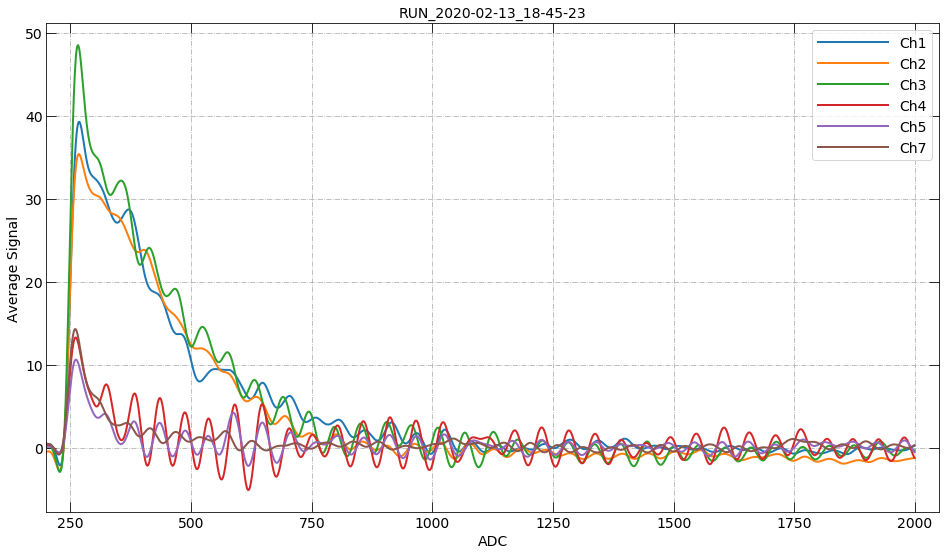

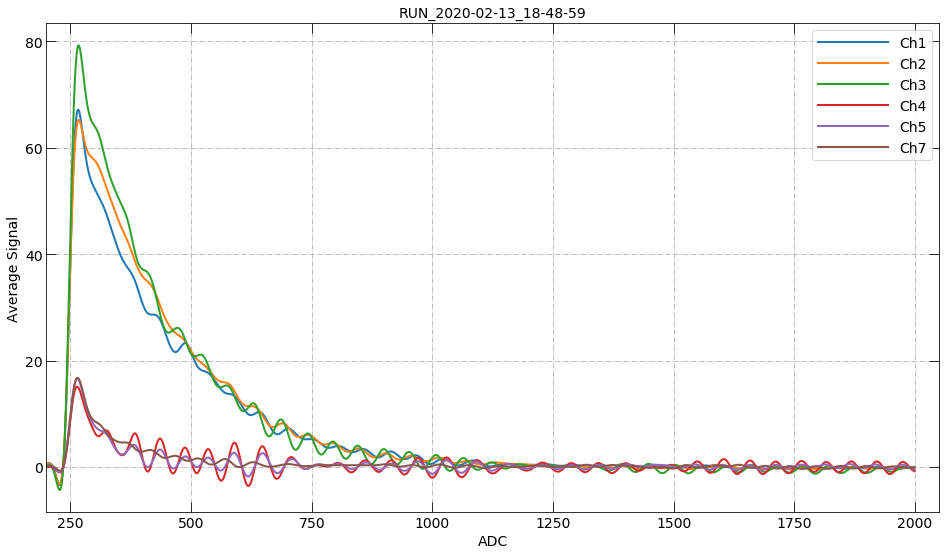

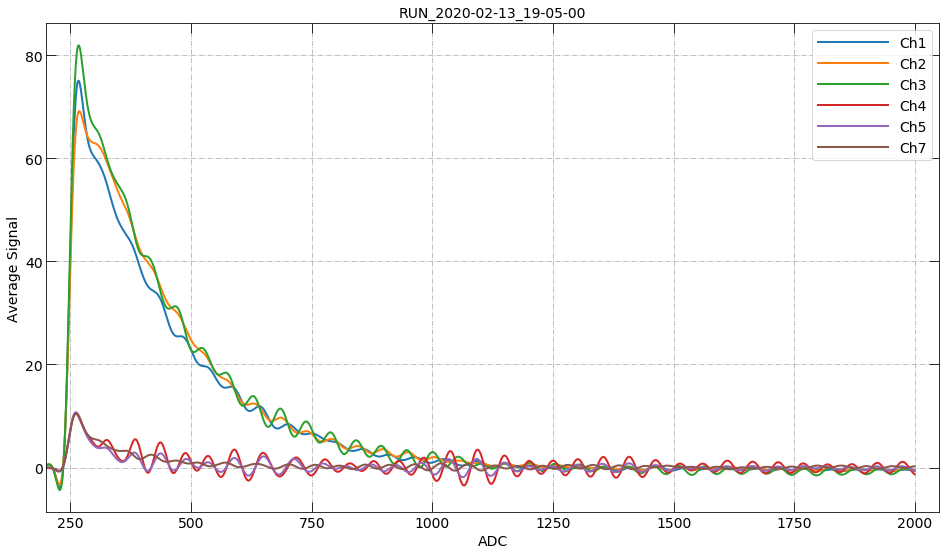

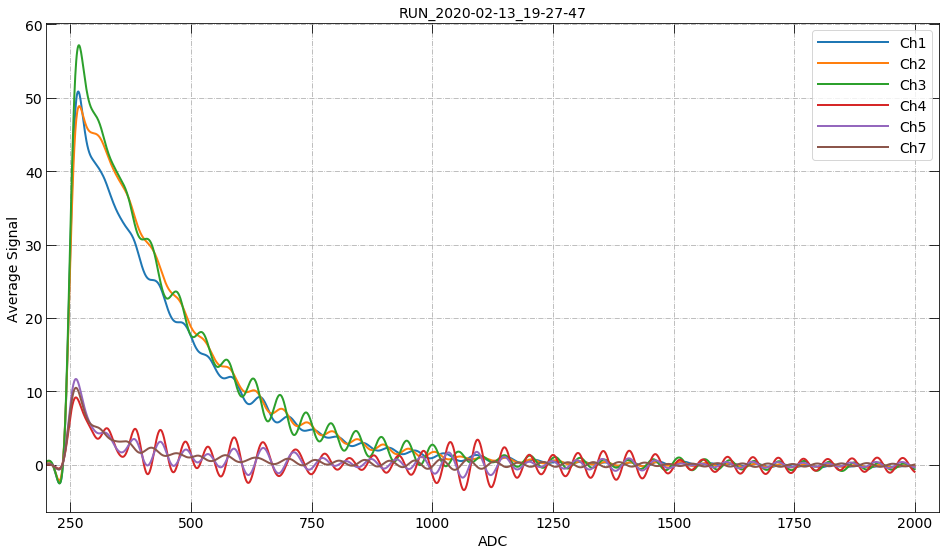

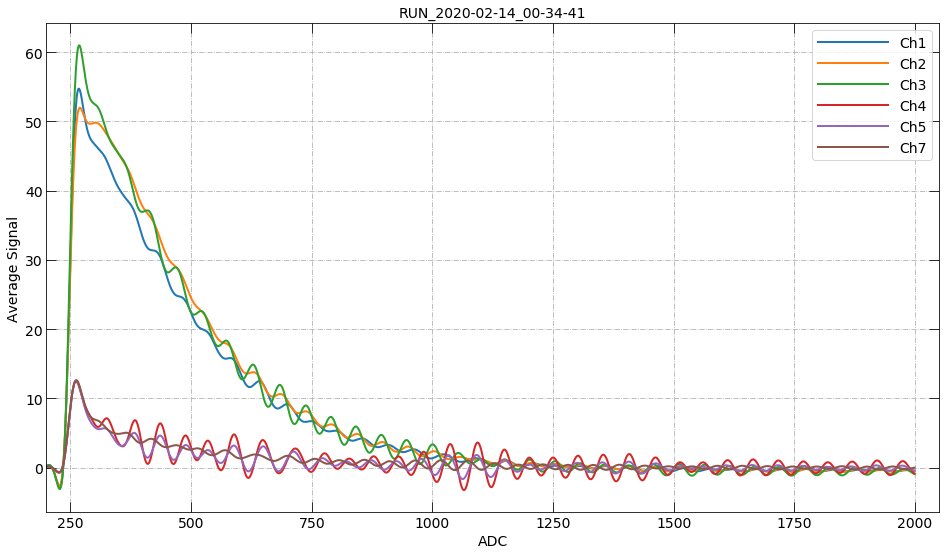

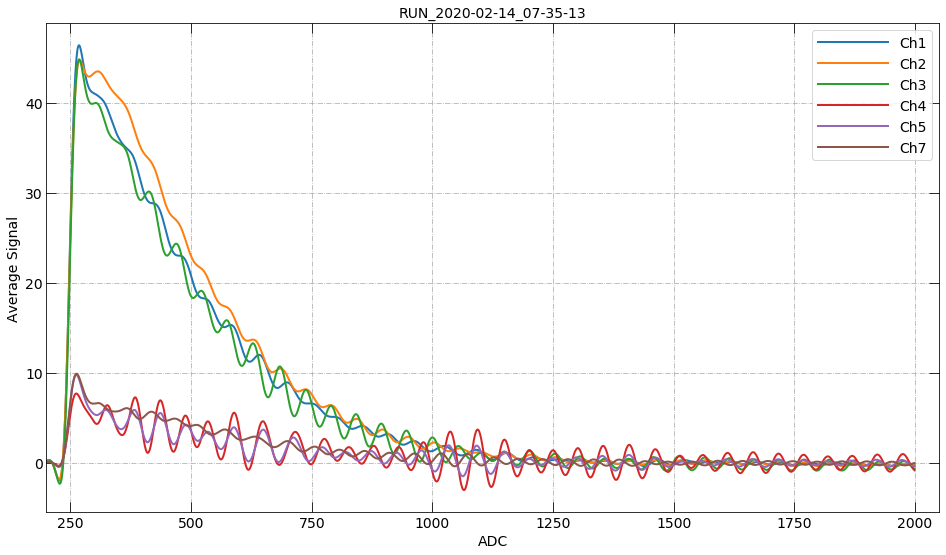

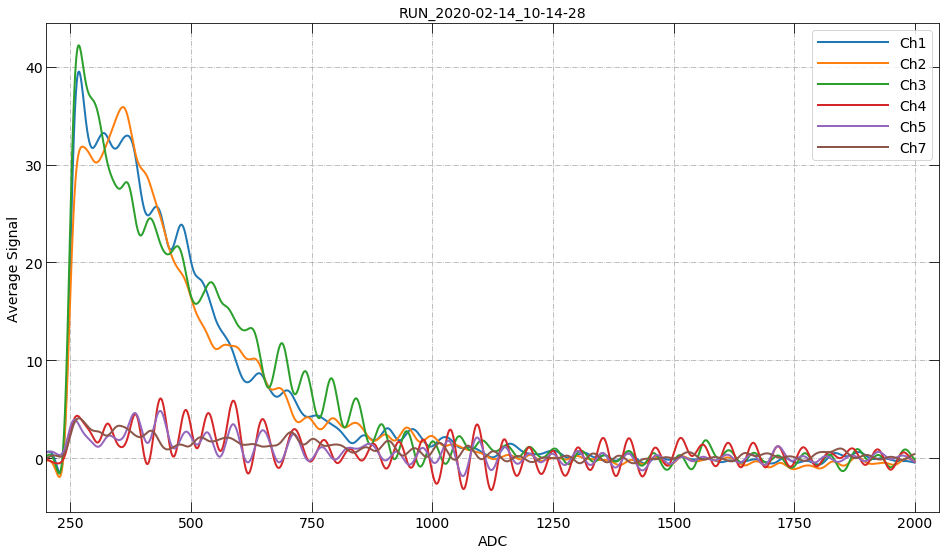

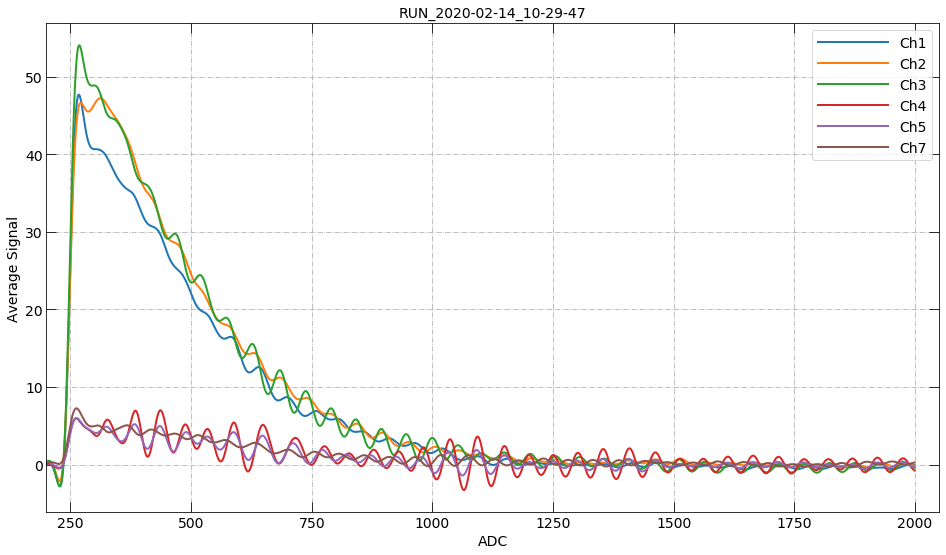

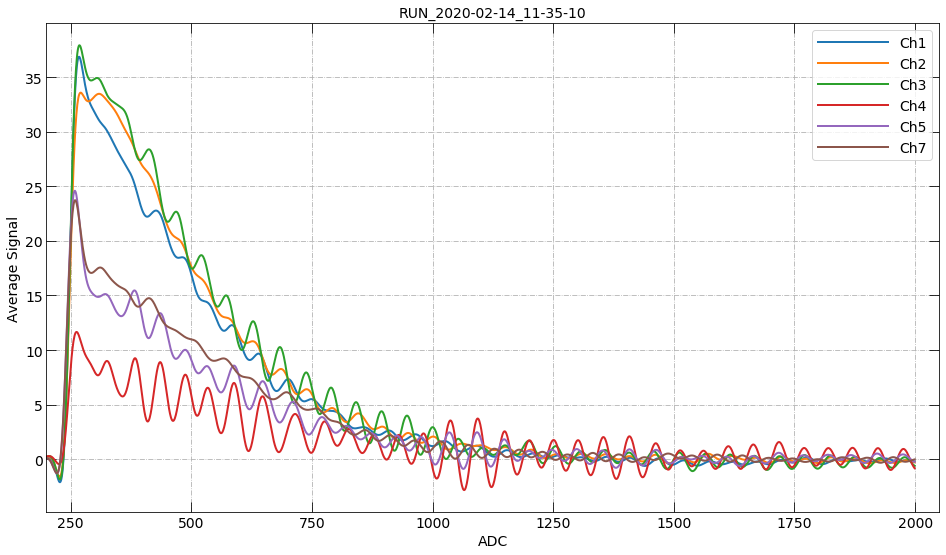

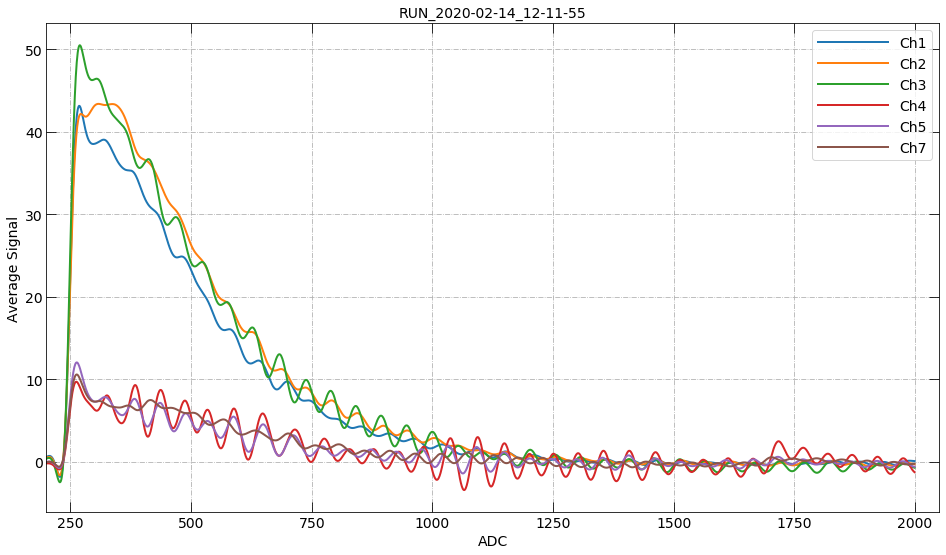

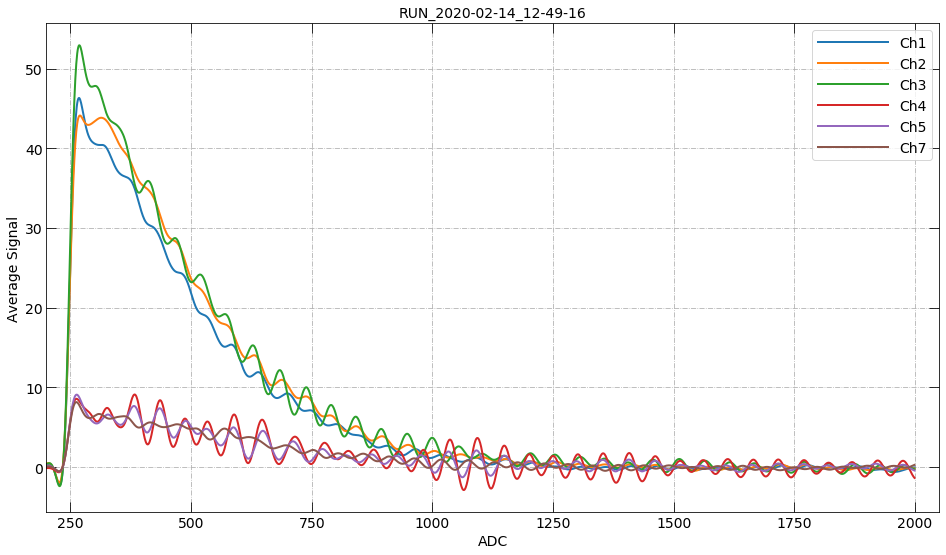

In [57]:
if not os.path.exists('run_filt'):
    os.makedirs('run_filt')
for filename in sorted(os.listdir(dirname)):
    if '.pkl' in filename:
            with open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)

            dict_s ={}
            for key, value in mydata.items():
                # lowpass filter
                b, a = signal.butter(3, 0.05)
                zi = signal.lfilter_zi(b, a)
                z, _ = signal.lfilter(b, a, value, zi=zi*value[0])
                z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
                channel = signal.filtfilt(b, a, value)
                 


                dict_s.update({key:channel})

            for key, value in dict_s.items():
                xtime=range(1, len(value) + 1),
                plt.plot(value, label=key, linewidth=2)
            plt.title('RUN_'+str(os.path.splitext(filename)[0]))
            plt.grid(True)
            #plt.yscale('log')
            plt.legend()
            #plt.ylim(0.0001, 100)
            plt.xlim(350, 2100)
            plt.xlabel('ADC')
            plt.ylabel('Average Signal')
            plot_path = os.path.abspath('run_filt') 
            plot_name = 'run_filt'+str(filename.split('.pkl')[0])+'.png'
            plt.savefig(os.path.join(plot_path, plot_name))
            plt.show()    

In [34]:
if not os.path.exists('channel'):
    os.makedirs('channel')
import scipy.integrate as integrate
int_dict = {}
#channels = ['Ch5','Ch7']
channels = ['Ch1', 'Ch2', 'Ch3', 'Ch4', 'Ch5', 'Ch7']

for ch in channels:
    Run=[]
    for filename in sorted(os.listdir(dirname)):
        #print(filename)
        if '.pkl' in filename:
            Run: Run.append('Run_' + '[' + filename.split('.pkl')[0] + ']')
            run_name = ('Run_' + '[' + filename.split('.pkl')[0] + ']')   
            with open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)
            b, a = signal.butter(3, 0.05)
            zi = signal.lfilter_zi(b, a)
            z, _ = signal.lfilter(b, a, mydata[ch], zi=zi*mydata[ch][0])
            z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
            y = signal.filtfilt(b, a, mydata[ch])
            result_simps = integrate.simps(mydata[ch][415:1415])
            print( run_name, ': ',int(result_simps))
            int_dict.update({ch + '_' + run_name : int(result_simps)})
            #print('test')
            t=range(1, len(y) + 1)

        
        #plt.grid(True)
        #plt.title(ch)
        #plt.plot(z2,linewidth=3,alpha=0.7)
        #plt.legend(Run)
        #plt.xlim(400, 1500)
        
        #plt.ylim(20, 60) 
    
    #plot_path = os.path.abspath('channel') 
    #plot_name = ch +'.png'
    #plt.savefig(os.path.join(plot_path, plot_name))
    
    #plt.show()


Run_[2020-02-14_23-04-44] :  11838
Run_[2020-02-15_08-01-01] :  11346
Run_[2020-02-15_12-07-21] :  13719
Run_[2020-02-15_19-27-13] :  11830
Run_[2020-02-20_19-23-41] :  12158
Run_[2020-02-21_14-17-51] :  12572
Run_[2020-02-21_17-03-34] :  11210
Run_[2020-02-22_17-12-50] :  9684
Run_[2020-02-23_16-29-08] :  10991
Run_[2020-02-23_20-23-44] :  9537
Run_[2020-02-24_10-52-25] :  10919
Run_[2020-02-26_17-25-27] :  11804
Run_[2020-02-26_22-37-37] :  12099
Run_[2020-02-27_10-16-47] :  12945
Run_[2020-02-27_15-48-53] :  13355
Run_[2020-02-27_20-44-12] :  14705
Run_[2020-02-27_23-53-44] :  13726
Run_[2020-02-28_08-54-47] :  14292
Run_[2020-02-28_12-31-10] :  13869
Run_[2020-02-28_18-28-36] :  14896
Run_[2020-02-29_15-49-01] :  14731
Run_[2020-03-02_14-33-42] :  14879
Run_[2020-03-03_16-19-55] :  11313
Run_[2020-03-03_22-45-07] :  12633
Run_[2020-03-05_16-34-38] :  12486
Run_[2020-03-05_20-40-54] :  10965
Run_[2020-03-06_11-10-01] :  12486
Run_[2020-02-14_23-04-44] :  12794
Run_[2020-02-15_08-01-

In [17]:
int_dict

{'Ch1_Run_[2020-02-14_23-04-44]': 11707,
 'Ch1_Run_[2020-02-15_08-01-01]': 11214,
 'Ch1_Run_[2020-02-15_12-07-21]': 13552,
 'Ch1_Run_[2020-02-15_19-27-13]': 11668,
 'Ch1_Run_[2020-02-20_19-23-41]': 12022,
 'Ch1_Run_[2020-02-21_14-17-51]': 12458,
 'Ch1_Run_[2020-02-21_17-03-34]': 11087,
 'Ch1_Run_[2020-02-22_17-12-50]': 9607,
 'Ch1_Run_[2020-02-23_16-29-08]': 10908,
 'Ch1_Run_[2020-02-23_20-23-44]': 9462,
 'Ch1_Run_[2020-02-24_10-52-25]': 10857,
 'Ch1_Run_[2020-02-26_17-25-27]': 11691,
 'Ch1_Run_[2020-02-26_22-37-37]': 12024,
 'Ch1_Run_[2020-02-27_10-16-47]': 12852,
 'Ch1_Run_[2020-02-27_15-48-53]': 13301,
 'Ch1_Run_[2020-02-27_20-44-12]': 14612,
 'Ch1_Run_[2020-02-27_23-53-44]': 13663,
 'Ch1_Run_[2020-02-28_08-54-47]': 14227,
 'Ch1_Run_[2020-02-28_12-31-10]': 13799,
 'Ch1_Run_[2020-02-28_18-28-36]': 14849,
 'Ch1_Run_[2020-02-29_15-49-01]': 14666,
 'Ch1_Run_[2020-03-02_14-33-42]': 14840,
 'Ch1_Run_[2020-03-03_16-19-55]': 11293,
 'Ch1_Run_[2020-03-03_22-45-07]': 12608,
 'Ch1_Run_[2020-03